In [ ]:
import seaborn as sns
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import altair as alt
universal_path="C:/Users/umber/Desktop/Assignment Data 2023-2024/"

#anni covid-10 2020-2021-2022

In [ ]:
player_valuations_df=pd.read_csv(universal_path+'player_valuations.csv')
game_events_df=pd.read_csv(universal_path+'game_events.csv')
games_df=pd.read_csv(universal_path+'games.csv')
players_df=pd.read_csv(universal_path+'players.csv')


### decremento del valore dei giocatori durante gli anni del covid-19

Text(0.5, 1.0, "media valore dei giocatori in correlazione all'anno")

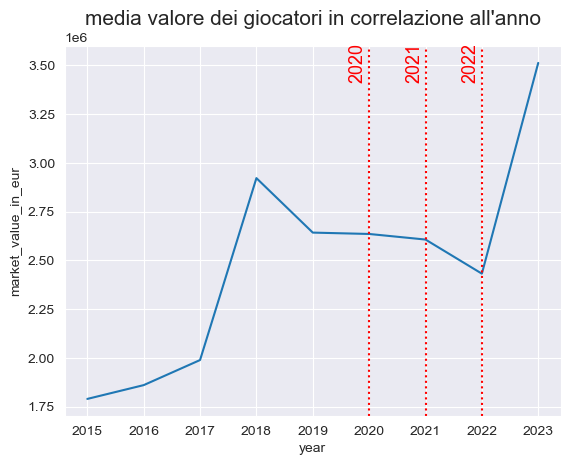

In [124]:
from matplotlib import ticker

player_valuations_df['date']=pd.to_datetime(player_valuations_df['date'])
player_valuations_df['year'] = player_valuations_df['date'].dt.year
filtered_player_valuations=player_valuations_df[player_valuations_df['year']>=2015]
avg_player_valuations=filtered_player_valuations.groupby('year')['market_value_in_eur'].mean().reset_index()
sns.lineplot(data=avg_player_valuations,x='year', y = 'market_value_in_eur')
plt.gca().xaxis.set_major_locator(ticker.MultipleLocator(1))
covid_years = [2020, 2021, 2022]
for year in covid_years:
    plt.axvline(x=year, color='red', linestyle=':')
    plt.text(year-0.2, avg_player_valuations['market_value_in_eur'].max(), str(year), color='red', ha='center',va='center',rotation=90, fontsize=13)

plt.title('media valore dei giocatori in correlazione all\'anno', fontsize=15)

In [148]:
players_df.columns

Index(['player_id', 'first_name', 'last_name', 'name', 'last_season',
       'current_club_id', 'player_code', 'country_of_birth', 'city_of_birth',
       'country_of_citizenship', 'date_of_birth', 'sub_position', 'position',
       'foot', 'height_in_cm', 'market_value_in_eur',
       'highest_market_value_in_eur', 'contract_expiration_date', 'agent_name',
       'image_url', 'url', 'current_club_domestic_competition_id',
       'current_club_name', 'total_goals_in_career', 'total_goals_last_season',
       'position_category'],
      dtype='object')

In [149]:
players_df

,player_id,first_name,last_name,name,last_season,current_club_id,player_code,country_of_birth,city_of_birth,country_of_citizenship,...,highest_market_value_in_eur,contract_expiration_date,agent_name,image_url,url,current_club_domestic_competition_id,current_club_name,total_goals_in_career,total_goals_last_season,position_category
0,598,Timo,Hildebrand,Timo Hildebrand,2014,24,timo-hildebrand,Germany,Worms,Germany,...,"10.000.000,00 €",NaN,NaN,https://img.a.transfermarkt.technology/portrai...,https://www.transfermarkt.co.uk/timo-hildebran...,L1,Eintracht Frankfurt,0,0,Portieri
1,670,Martin,Petrov,Martin Petrov,2012,714,martin-petrov,Bulgaria,Vratsa,Bulgaria,...,"12.000.000,00 €",NaN,IFM,https://img.a.transfermarkt.technology/portrai...,https://www.transfermarkt.co.uk/martin-petrov/...,ES1,RCD Espanyol Barcelona,0,0,NaN
2,1323,Martin,Amedick,Martin Amedick,2012,24,martin-amedick,Germany,Paderborn,Germany,...,"2.750.000,00 €",NaN,NaN,https://img.a.transfermarkt.technology/portrai...,https://www.transfermarkt.co.uk/martin-amedick...,L1,Eintracht Frankfurt,0,0,Difensori
3,3195,Jermaine,Pennant,Jermaine Pennant,2013,512,jermaine-pennant,England,Nottingham,England,...,"10.500.000,00 €",NaN,Andrew Sky,https://img.a.transfermarkt.technology/portrai...,https://www.transfermarkt.co.uk/jermaine-penna...,GB1,Stoke City,1,0,NaN
4,3259,Damien,Duff,Damien Duff,2013,931,damien-duff,Ireland,Ballyboden,Ireland,...,"17.000.000,00 €",NaN,NaN,https://img.a.transfermarkt.technology/portrai...,https://www.transfermarkt.co.uk/damien-duff/pr...,GB1,Fulham FC,3,0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30297,371851,Jaka,Bijol,Jaka Bijol,2023,410,jaka-bijol,Slovenia,Vuzenica,Slovenia,...,"10.000.000,00 €",2027-06-30,MSC GROUP,https://img.a.transfermarkt.technology/portrai...,https://www.transfermarkt.co.uk/jaka-bijol/pro...,IT1,Udinese Calcio,11,2,Difensori
30298,537171,Semuel,Pizzignacco,Semuel Pizzignacco,2018,410,semuel-pizzignacco,Italy,Monfalcone,Italy,...,"350.000,00 €",2025-06-30,NaN,https://img.a.transfermarkt.technology/portrai...,https://www.transfermarkt.co.uk/semuel-pizzign...,IT1,Udinese Calcio,0,0,Portieri
30299,586756,Festy,Ebosele,Festy Ebosele,2023,410,festy-ebosele,Ireland,"Enniscorthy, Wexford",Ireland,...,"4.500.000,00 €",2027-06-30,The Kulture Group,https://img.a.transfermarkt.technology/portrai...,https://www.transfermarkt.co.uk/festy-ebosele/...,IT1,Udinese Calcio,0,0,NaN
30300,704692,Nicolò,Cocetta,Nicolò Cocetta,2022,410,nicolo-cocetta,Italy,San Daniele del Friuli,Italy,...,"75.000,00 €",2023-06-30,NaN,https://img.a.transfermarkt.technology/portrai...,https://www.transfermarkt.co.uk/nicolo-cocetta...,IT1,Udinese Calcio,0,0,Difensori


### seleziono solo le colonne necessarie e sostituisco le stringhe dei valori di mercato in varibili di tipo float

In [146]:
#seleziono solo le colonne necessarie e converto la stringa dei market value in float
players_df_for_graph=players_df[['player_id', 'name', 'last_season',
                  'market_value_in_eur', 'highest_market_value_in_eur',
                  'total_goals_in_career', 'total_goals_last_season', 'position','sub_position', 'date_of_birth','current_club_domestic_competition_id']]
players_df_for_graph = players_df_for_graph.dropna(subset=['market_value_in_eur'])

# Rimuovi il simbolo dell'euro e i punti per le migliaia, sostituisci la virgola con il punto per market_value_in_eur
players_df_for_graph['market_value_in_eur'] = players_df_for_graph['market_value_in_eur'].str.replace('€', '')  
players_df_for_graph['market_value_in_eur'] = players_df_for_graph['market_value_in_eur'].str.replace('.', '')  
players_df_for_graph['market_value_in_eur'] = players_df_for_graph['market_value_in_eur'].str.replace(',', '.')  
players_df_for_graph['market_value_in_eur'] = players_df_for_graph['market_value_in_eur'].astype(float)

# Rimuovi il simbolo dell'euro e i punti per le migliaia, sostituisci la virgola con il punto per highest_market_value_in_eur
players_df_for_graph['highest_market_value_in_eur'] = players_df_for_graph['highest_market_value_in_eur'].str.replace('€', '')  
players_df_for_graph['highest_market_value_in_eur'] = players_df_for_graph['highest_market_value_in_eur'].str.replace('.', '')  
players_df_for_graph['highest_market_value_in_eur'] = players_df_for_graph['highest_market_value_in_eur'].str.replace(',', '.')  
players_df_for_graph['highest_market_value_in_eur'] = players_df_for_graph['highest_market_value_in_eur'].astype(float)
players_df_for_graph

,player_id,name,last_season,market_value_in_eur,highest_market_value_in_eur,total_goals_in_career,total_goals_last_season,position,sub_position,date_of_birth,current_club_domestic_competition_id
7,4042,Brad Jones,2017,100000.0,2000000.0,1,0,Goalkeeper,Goalkeeper,1982-03-19,NL1
33,8187,Juanmi Callejón,2012,200000.0,1000000.0,0,0,Attack,Left Winger,1987-02-11,GR1
72,18922,Karim Benzema,2022,25000000.0,60000000.0,279,44,Attack,Centre-Forward,1987-12-19,ES1
89,22860,Jesper Hansen,2023,200000.0,1000000.0,2,1,Goalkeeper,Goalkeeper,1985-03-31,DK1
93,23365,Reginaldo,2012,10000.0,3500000.0,6,0,Attack,Centre-Forward,1983-07-31,IT1
...,...,...,...,...,...,...,...,...,...,...,...
30297,371851,Jaka Bijol,2023,10000000.0,10000000.0,11,2,Defender,Centre-Back,1999-02-05,IT1
30298,537171,Semuel Pizzignacco,2018,325000.0,350000.0,0,0,Goalkeeper,Goalkeeper,2001-09-01,IT1
30299,586756,Festy Ebosele,2023,4500000.0,4500000.0,0,0,Midfield,Right Midfield,2002-08-02,IT1
30300,704692,Nicolò Cocetta,2022,75000.0,75000.0,0,0,Defender,Centre-Back,2003-12-19,IT1


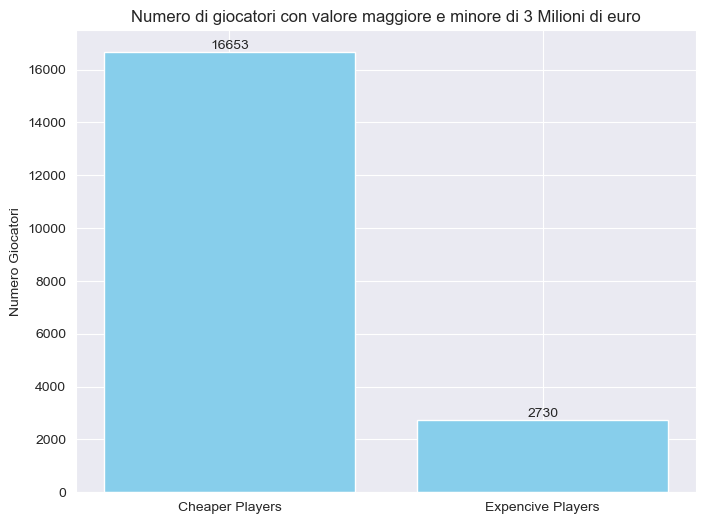

In [150]:
cheaper_players = players_df_for_graph[players_df_for_graph['market_value_in_eur']<3000000]
number_cheaper_players = len(cheaper_players)
expencive_players = players_df_for_graph[players_df_for_graph['market_value_in_eur']>=3000000]
number_expencive_players = len(expencive_players)
categories = ['Cheaper Players', 'Expencive Players']
data = [number_cheaper_players, number_expencive_players]

# Creazione del barplot con matplotlib
plt.figure(figsize=(8, 6))
bars = plt.bar(categories, data, color='skyblue')
plt.title('Numero di giocatori con valore maggiore e minore di 3 Milioni di euro')
plt.ylabel('Numero Giocatori')

# Aggiungi i valori sopra le barre
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2.0, height, f'{int(height)}', ha='center', va='bottom')

plt.show()  

# confronto i giocatori economici e costosi in relazione al numero di goal segnati
## Cheaper Players:
### La maggior parte dei giocatori economici segna pochi o nessun goal. Solo un numero molto piccolo di giocatori economici riesce a segnarne più di 10.
## Expensive Players:
### I goal segnati dai giocatori costosi è molto più varia. C'è una presenza significativa di giocatori che segnano un numero elevato di goal, il che è coerente con l'aspettativa che i giocatori più costosi siano generalmente più performanti.


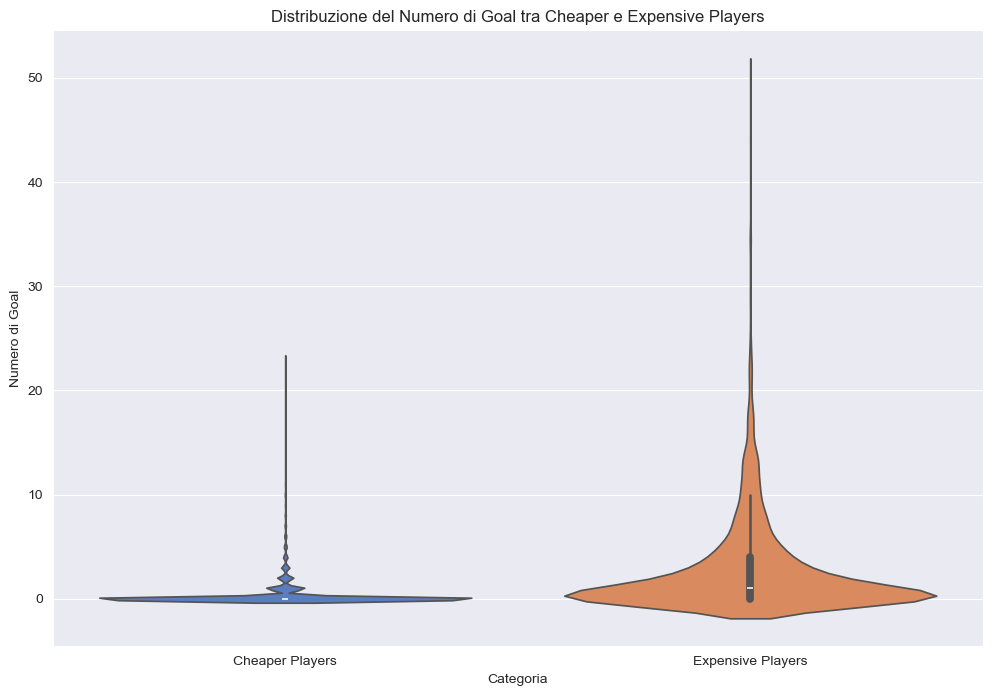

In [151]:
# Filtra i dati
cheaper_players = players_df_for_graph[players_df_for_graph['market_value_in_eur'] < 3000000].copy()
expensive_players = players_df_for_graph[players_df_for_graph['market_value_in_eur'] >= 3000000].copy()

# Aggiungi una colonna per indicare la categoria usando .loc
cheaper_players.loc[:, 'category'] = 'Cheaper Players'
expensive_players.loc[:, 'category'] = 'Expensive Players'

# Unisci i due DataFrame
combined_df = pd.concat([cheaper_players, expensive_players])

# Creazione del violinplot con seaborn
plt.figure(figsize=(12, 8))
sns.violinplot(x='category', y='total_goals_last_season', hue='category', data=combined_df, palette='muted', legend=False)

plt.title('Distribuzione del Numero di Goal tra Cheaper e Expensive Players')
plt.xlabel('Categoria')
plt.ylabel('Numero di Goal')

plt.show()

In [152]:
goalkeeper_df = players_df_for_graph[players_df_for_graph['position'] == 'Goalkeeper']
number_goalkeepers = len(goalkeeper_df)
total_goals_goalkeeper = goalkeeper_df['total_goals_in_career'].sum()

defenders_df = players_df_for_graph[players_df_for_graph['position'] == 'Defender']
number_defenders = len(defenders_df)
total_goals_defenders = defenders_df['total_goals_in_career'].sum()

# Calcola il numero totale di goal fatti dai centrocampisti
midfielders_df = players_df_for_graph[players_df_for_graph['position'] == 'Midfield']
number_midfielders = len(midfielders_df)
total_goals_midfielders = midfielders_df['total_goals_in_career'].sum()

# Calcola il numero totale di goal fatti dagli attaccanti
attackers_df = players_df_for_graph[players_df_for_graph['position'] == 'Attack']
number_attackers = len(attackers_df)
total_goals_attackers = attackers_df['total_goals_in_career'].sum()

print(f"Numero totale di goal fatti dai portieri: {total_goals_goalkeeper}")
print(f"Numero totale di goal fatti dai difensori: {total_goals_defenders}")
print(f"Numero totale di goal fatti dai centrocampisti: {total_goals_midfielders}")
print(f"Numero totale di goal fatti dagli attaccanti: {total_goals_attackers}")
print(f"Numero totale di portieri: {number_goalkeepers}")
print(f"Numero totale di difensori: {number_defenders}")
print(f"Numero totale di centrocampisti: {number_midfielders}")
print(f"Numero totale di attaccanti: {number_attackers}")




Numero totale di goal fatti dai portieri: 296
Numero totale di goal fatti dai difensori: 17919
Numero totale di goal fatti dai centrocampisti: 34037
Numero totale di goal fatti dagli attaccanti: 75380
Numero totale di portieri: 2091
Numero totale di difensori: 6147
Numero totale di centrocampisti: 5606
Numero totale di attaccanti: 5524


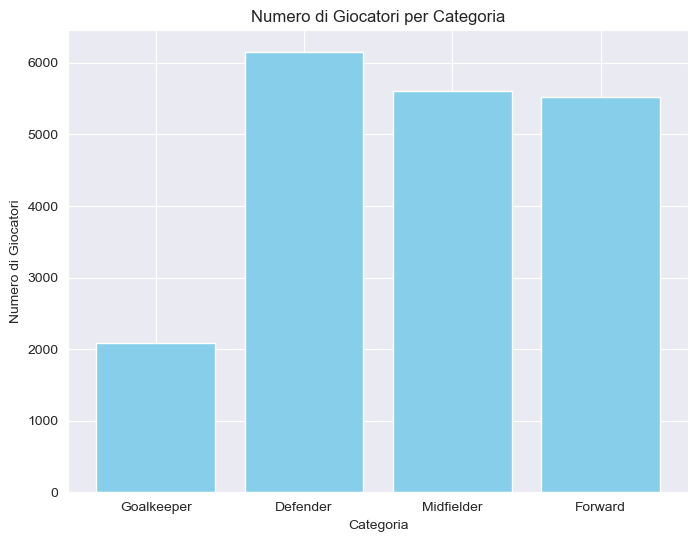

In [153]:
categories = ['Goalkeeper', 'Defender', 'Midfielder', 'Forward']
total_player = [number_goalkeepers, number_defenders, number_midfielders, number_attackers]

# Creazione del barplot con matplotlib
plt.figure(figsize=(8, 6))
plt.bar(categories, total_player, color='skyblue')
plt.title('Numero di Giocatori per Categoria')
plt.xlabel('Categoria')
plt.ylabel('Numero di Giocatori')
plt.show()

### la maggioranza dei giocatori costosi sono tutti attaccanti

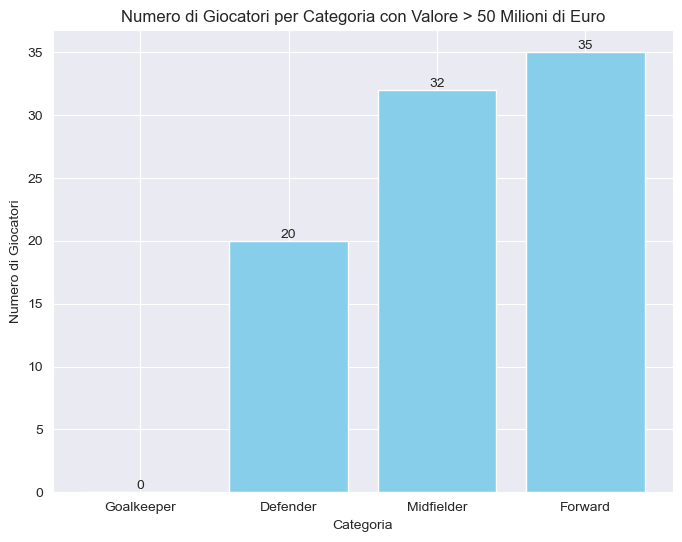

In [158]:
# Filtra i giocatori con valore di mercato maggiore di 50 milioni di euro
high_value_players = players_df_for_graph[players_df_for_graph['market_value_in_eur'] > 50000000]

# Conta il numero di giocatori in ciascuna categoria
number_goalkeepers = len(high_value_players[high_value_players['position'] == 'Goalkeeper'])
number_defenders = len(high_value_players[high_value_players['position'] == 'Defender'])
number_midfielders = len(high_value_players[high_value_players['position'] == 'Midfield'])
number_attackers = len(high_value_players[high_value_players['position'] == 'Attack'])

categories = ['Goalkeeper', 'Defender', 'Midfielder', 'Forward']
total_player = [number_goalkeepers, number_defenders, number_midfielders, number_attackers]

# Creazione del barplot con matplotlib
plt.figure(figsize=(8, 6))
bars = plt.bar(categories, total_player, color='skyblue')
plt.title('Numero di Giocatori per Categoria con Valore > 50 Milioni di Euro')
plt.xlabel('Categoria')
plt.ylabel('Numero di Giocatori')

# Aggiungi i valori sopra le barre
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2.0, height, f'{int(height)}', ha='center', va='bottom')

plt.show()

### questo è anche dovuto al fatto che quasi tutti i goal sono segnati da loro nonostante siano molti meno rispetto a tutti gli altri ruoli nel nostro databse

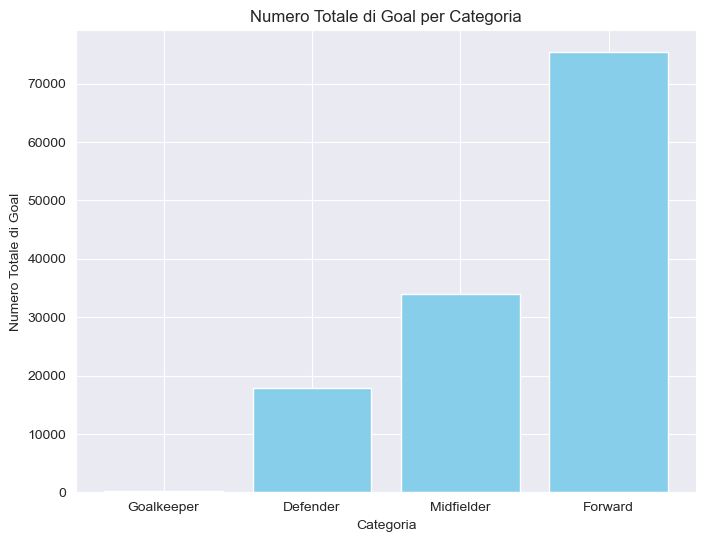

In [117]:
categories = ['Goalkeeper', 'Defender', 'Midfielder', 'Forward']
total_goals = [total_goals_goalkeeper, total_goals_defenders, total_goals_midfielders, total_goals_attackers]

# Creazione del barplot con matplotlib
plt.figure(figsize=(8, 6))
plt.bar(categories, total_goals, color='skyblue')
plt.title('Numero Totale di Goal per Categoria')
plt.xlabel('Categoria')
plt.ylabel('Numero Totale di Goal')
plt.show()

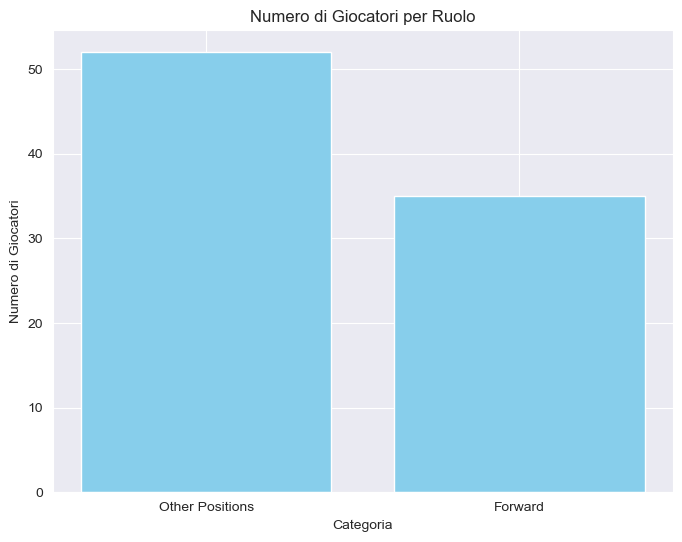

In [161]:
categories = ['Other Positions', 'Forward']
total_player = [number_goalkeepers+number_defenders+number_midfielders, number_attackers]

# Creazione del barplot con matplotlib
plt.figure(figsize=(8, 6))
plt.bar(categories, total_player, color='skyblue')
plt.title('Numero di Giocatori per Ruolo')
plt.xlabel('Categoria')
plt.ylabel('Numero di Giocatori')
plt.show()

In [120]:
df_subset = players_df_for_graph[(players_df_for_graph['position'] == 'Attack') & 
                                 (players_df_for_graph['market_value_in_eur'] > 50000000)]
df_subset

,player_id,name,last_season,market_value_in_eur,highest_market_value_in_eur,total_goals_in_career,total_goals_last_season,position,sub_position,date_of_birth,current_club_domestic_competition_id
596,192565,Leroy Sané,2023,65000000.0,100000000.0,96,14,Attack,Right Winger,1996-01-11,L1
1060,411295,Raphinha,2023,60000000.0,60000000.0,63,11,Attack,Right Winger,1996-12-14,ES1
1292,610442,Rasmus Højlund,2023,65000000.0,65000000.0,19,3,Attack,Centre-Forward,2003-02-04,GB1
1838,357164,Rafael Leão,2023,90000000.0,90000000.0,56,14,Attack,Left Winger,1999-06-10,IT1
3072,576024,Julián Álvarez,2023,80000000.0,80000000.0,25,0,Attack,Centre-Forward,2000-01-31,GB1
4135,132098,Harry Kane,2023,90000000.0,150000000.0,294,22,Attack,Centre-Forward,1993-07-28,L1
4608,342229,Kylian Mbappé,2023,180000000.0,200000000.0,222,34,Attack,Centre-Forward,1998-12-20,FR1
4750,406625,Lautaro Martínez,2023,100000000.0,100000000.0,117,25,Attack,Centre-Forward,1997-08-22,IT1
4867,487969,Randal Kolo Muani,2023,80000000.0,80000000.0,51,12,Attack,Centre-Forward,1998-12-05,FR1
6148,203460,Jack Grealish,2023,75000000.0,100000000.0,26,6,Attack,Left Winger,1995-09-10,GB1


### correlazione tra goal segnati e valore di mercato tra i giocatori che valgono più di 20 milioni di euro 

In [121]:
df_subset = players_df_for_graph[(players_df_for_graph['position'] == 'Attack') & 
                                 (players_df_for_graph['market_value_in_eur'] > 20000000)]


# Calcola la regressione lineare con NumPy
goals = df_subset['total_goals_last_season']
market_value = df_subset['market_value_in_eur']
slope, intercept = np.polyfit(goals, market_value, 1)

# Crea il DataFrame per la linea di tendenza
trendline_df = pd.DataFrame({
    'goals': [goals.min(), goals.max()],
    'trendline': [slope * goals.min() + intercept, slope * goals.max() + intercept]
})

# Crea il grafico a dispersione con Altair
scatter_plot = alt.Chart(df_subset).mark_circle().encode(
    x='total_goals_last_season:Q',
    y='market_value_in_eur:Q',
    tooltip=['name']
).properties(
    title='Correlazione tra Valore di Mercato e Numero di Goal (Giocatori con Posizione = Attack e Valore > 20 Milioni)',
    width=600,
    height=400
)

# Aggiungi la linea di tendenza
trendline = alt.Chart(trendline_df).mark_line(color='red').encode(
    x='goals:Q',
    y='trendline:Q'
)

# Componi il grafico finale
final_chart = (scatter_plot + trendline)

# Mostra il grafico interattivo
final_chart.interactive()

C:\Users\umber\miniconda3\envs\FootbrawlAnalytics\Lib\site-packages\altair\utils\core.py:395: FutureWarning: the convert_dtype parameter is deprecated and will be removed in a future version.  Do ``ser.astype(object).apply()`` instead if you want ``convert_dtype=False``.
  col = df[col_name].apply(to_list_if_array, convert_dtype=False)
C:\Users\umber\miniconda3\envs\FootbrawlAnalytics\Lib\site-packages\altair\utils\core.py:395: FutureWarning: the convert_dtype parameter is deprecated and will be removed in a future version.  Do ``ser.astype(object).apply()`` instead if you want ``convert_dtype=False``.
  col = df[col_name].apply(to_list_if_array, convert_dtype=False)
C:\Users\umber\miniconda3\envs\FootbrawlAnalytics\Lib\site-packages\altair\utils\core.py:395: FutureWarning: the convert_dtype parameter is deprecated and will be removed in a future version.  Do ``ser.astype(object).apply()`` instead if you want ``convert_dtype=False``.
  col = df[col_name].apply(to_list_if_array, convert

alt.LayerChart(...)

### l'età influisce sul valore di mercato dei top gicoatori infatti se togliamo i giocatori over 25, la rettà di trend assume un inclinazione maggiore e il loro valore dipende ancora di piu dal numero di goal. i giocatori a fine carriera invece, anche se segnano molti goal, il loro valore sarà sempre minore rispetto ad un giovane

In [122]:
df_subset = players_df_for_graph[(players_df_for_graph['position'] == 'Attack') & 
                                 (players_df_for_graph['market_value_in_eur'] > 20000000) &
                                 (players_df_for_graph['date_of_birth'] > '1999-01-01')]

# Calcola la regressione lineare con NumPy
goals = df_subset['total_goals_last_season']
market_value = df_subset['market_value_in_eur']
slope, intercept = np.polyfit(goals, market_value, 1)

# Crea il DataFrame per la linea di tendenza
trendline_df = pd.DataFrame({
    'goals': [goals.min(), goals.max()],
    'trendline': [slope * goals.min() + intercept, slope * goals.max() + intercept]
})

# Crea il grafico a dispersione con Altair
scatter_plot = alt.Chart(df_subset).mark_circle().encode(
    x='total_goals_last_season:Q',
    y='market_value_in_eur:Q',
    tooltip=['name']
).properties(
    title='Correlazione tra Valore di Mercato e Numero di Goal (Giocatori con Posizione = Attack e Valore > 20 Milioni e Età < 25 anni)',
    width=600,
    height=400
)

# Aggiungi la linea di tendenza
trendline = alt.Chart(trendline_df).mark_line(color='red').encode(
    x='goals:Q',
    y='trendline:Q'
)

# Componi il grafico finale
final_chart = (scatter_plot + trendline)

# Mostra il grafico interattivo
final_chart.interactive()

C:\Users\umber\miniconda3\envs\FootbrawlAnalytics\Lib\site-packages\altair\utils\core.py:395: FutureWarning: the convert_dtype parameter is deprecated and will be removed in a future version.  Do ``ser.astype(object).apply()`` instead if you want ``convert_dtype=False``.
  col = df[col_name].apply(to_list_if_array, convert_dtype=False)
C:\Users\umber\miniconda3\envs\FootbrawlAnalytics\Lib\site-packages\altair\utils\core.py:395: FutureWarning: the convert_dtype parameter is deprecated and will be removed in a future version.  Do ``ser.astype(object).apply()`` instead if you want ``convert_dtype=False``.
  col = df[col_name].apply(to_list_if_array, convert_dtype=False)
C:\Users\umber\miniconda3\envs\FootbrawlAnalytics\Lib\site-packages\altair\utils\core.py:395: FutureWarning: the convert_dtype parameter is deprecated and will be removed in a future version.  Do ``ser.astype(object).apply()`` instead if you want ``convert_dtype=False``.
  col = df[col_name].apply(to_list_if_array, convert

alt.LayerChart(...)